In this exercise we will run 2 Models using a sarcasm dataset: 1 with a Bidirectional LSTM as its layer and another with 1D Convolutional layer. We will then plot the accuracy and loss of the two models and compare it

In [21]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /Users/tanuj/Natural-Language-Processing-in-TensorFlow/Conv_vs_GRU_dataset/sarcasm.json

--2020-11-23 23:44:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4001:816::2010, 2a00:1450:4001:81a::2010, 2a00:1450:4001:821::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4001:816::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: '/Users/tanuj/Natural-Language-Processing-in-TensorFlow/Conv_vs_GRU_dataset/sarcasm.json'

     0K .......... .......... .......... .......... ..........  0%  539K 10s
    50K .......... .......... .......... .......... ..........  1% 2.60M 6s
   100K .......... .......... .......... .......... ..........  2% 3.31M 5s
   150K .......... .......... .......... .......... ..........  3% 3.29M 4s
   200K .......... .......... .......... .......... ..........  4% 3.12M 3s
   250K .......... .......... .......... .......... ..........  5% 3.05M 3s
 

In [10]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("Conv_vs_GRU_dataset/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 80s 4ms/sample - loss: 0.4538 - acc: 0.7731 - val_loss: 0.3913 - val_acc: 0.8205
Epoch 2/50
20000/20000 [==============================] - 80

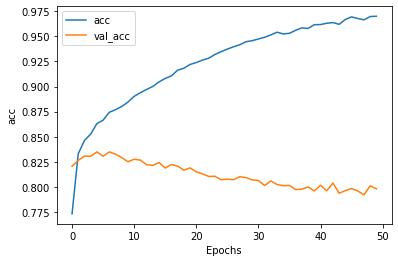

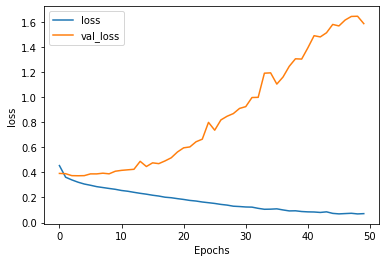

In [19]:
# Model with Bidirectional LSTM as a Layer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history_LSTM = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=1)


# Plot

import matplotlib.pyplot as plt

def plot_graphs(history_LSTM, string):
  plt.plot(history_LSTM.history[string])
  plt.plot(history_LSTM.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_LSTM, 'acc')
plot_graphs(history_LSTM, 'loss')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 4s 204us/

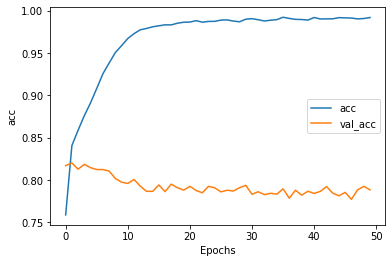

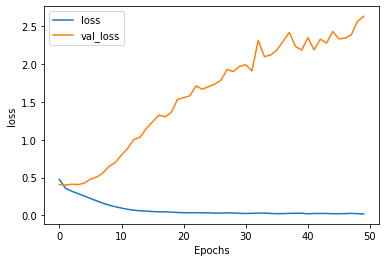

In [20]:

# Model with 1D Convolutional as a Layer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history_conv = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=1)


# Plot

import matplotlib.pyplot as plt


def plot_graphs(history_conv, string):
  plt.plot(history_conv.history[string])
  plt.plot(history_conv.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_conv, 'acc')
plot_graphs(history_conv, 'loss')